# Data Exploration and Report Generation

Data exploration is a crucial step in the data analysis process to understand the structure, patterns, and characteristics of datasets. This Jupyter notebook explores the dataset of the project and gains valuable insights. Here's an outline of the structure of this data exploration notebook:

1. Introduction and motivation: 
A brief overview of the project and the dataset.
2. Install Dependencies:
Install the required dependencies.
3. Methods:
ETL pipeline building and Problems encountered
4. Import Packages:
Import the necessary packages.
5. Data Loading:
Load the data into a notebook.
6. Data Inspection :
Explore the dataset for basic understanding.
7. Data Visualization: 
Create visualizations to explore the data and gain insights.
8. Correlation Analysis:
Analyze the correlation between data, summary of the plots
9. Conclusion: 
Summarize the key findings and insights obtained from the data exploration.
10. Limitations and Future works





# 1.Introduction & Motivation:

<b>Exploring the Correlation Between Unemployment and Crime Rates in  Countries Over Two Decades (2000-2020)</b>

In the realm of socio-economic analysis, understanding the potential correlations between unemployment rates and crime rates holds significant importance. This project delves into exploring the interplay between unemployment and crime data across a selection of prominent global entities. Specifically, we focus on the G7 countries - Canada, France, Germany, Italy, Japan, the United Kingdom, and the United States, along with the European Union and India. By examining the statistical relationships between these two critical indicators, we aim to uncover patterns, trends, and potential insights that could contribute to informed policy-making and societal well-being.

The choice to focus on the G7 countries, and India offers a diverse representation of economic structures, cultural contexts, and governance models. By scrutinizing these distinct entities, we aim to draw nuanced insights that transcend regional boundaries and contribute to a more global understanding of the relationship between unemployment and crime.

Through the lens of statistical analysis, this project seeks to unravel patterns and trends, identifying potential correlations that can guide evidence-based policymaking. The implications of such findings could extend to the formulation of targeted interventions, social programs, and economic policies aimed at mitigating both unemployment and crime. This research endeavor aligns with the broader goal of fostering societal well-being by providing stakeholders with valuable insights into the interconnected dynamics of unemployment and crime rates over time.

Moreover, as technological advancements and globalization reshape the economic landscape, it becomes increasingly pertinent to reevaluate established notions and adapt strategies to address emerging challenges. The temporal scope of our analysis, spanning several decades, allows us to observe trends in the context of evolving socio-economic conditions, providing a historical perspective to contemporary discussions on unemployment and crime.


# 2. Install dependencies

Install the dependencies that are required in the exploration.

In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\rajsi\anaconda3\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\rajsi\anaconda3\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\rajsi\anaconda3\python.exe -m pip install --upgrade pip


# 3. Methods

<b>1. About Dataset </b>

<b>Unemployment Dataset :</b> Unemployment refers to the share of the labor force that is without work but available for and seeking employment Source: International Labour Organisation <br>https://api.worldbank.org/v2/en/indicator/SL.UEM.TOTL.ZS?download format=csv<br>Meta Data: https://databank.worldbank.org/reports.aspx?source=2&type=metadata&series=SL.UEM.TOTL.ZS<br> 
Data Type: Zipped CSV <br>
This database contains information about countries, their unemployment rates from 1960 to 2022 of which there is no data available till 1990. And thus transformed data from the year 1991 to 2022 was taken into account

<b>Intentional homicides (per 100,000 people) (alias Crime Dataset) :</b> Intentional homicides are estimates of unlawful homicides purposely inflicted as a result of domestic disputes, interpersonal violence, violent conflicts over land resources, intergang violence over turf or control, and predatory violence and killing by armed groups. This definition excludes deaths arising from armed conflict Intentional homicides (per 100,000 people) Source: UN Office on Drugs and Crime's International Homicide Statistics database. <br>
    https://api.worldbank.org/v2/en/indicator/SL.UEM.TOTL.ZS?downloadformat=csv <br>
    Meta Data:  https://databank.worldbank.org/reports.aspx?source=2&type=metadata&series=VC.IHR.PSRC.P5<br>  Data Type: Zipped CSV
<br>This database contains information about countries, their unemployment rates from 1960 to 2022 of which there is no data available till 1989. And thus transformed data from the year 1990 to 2021 was taken into account

The above datasets were available publically and I thought there is a correlation between two.

<b>2. How you built your data pipeline ? </b>

Given the project's need for two distinct datasets, I made an ETL (Extract, Transform, Load) pipeline which initiates with data extraction from its original source, transforming the data according to our need and then cultimates by storing the processed data in a CSV file for further expploration 

The pipeline consisted of 3 
   1.  extract.py: This python code is responsible for extracting  data from the original sources. The International Labour Organisation and the UN Office on Drugs and Crime's International Homicide Statistics database served as the primary sources for unemployment and crime data, respectively.
   2. transform.py : The transformation step in the pipeline presented a significant challenge, especially with the crime dataset. Addressing issues such as empty or extensively null values in the crime data required meticulous handling. To ensure a uniform dataset for analysis, the shape of both the crime and unemployment datasets was aligned. Specifically, data from 1960 to 1990 (where unavailable)thus taken data from 1991 to 2021 into account and were transformed into a consistent format, facilitating seamless exploration and comparison. After 1st round of transformation around 70 countries remained same in both crime and unemployment dataset but the focus was narrowed down to the G7 countries and India for a more targeted investigation.
   3. load.py : After data transformation, the load module takes charge of storing the processed data in a CSV file. This step ensures that the cleaned and standardized dataset is readily available for subsequent exploration and analysis. The CSV format is chosen for its simplicity, widespread compatibility, and ease of use in various analytical tools.
   4. pipeline.py : This orchestrating module brings together the extract, transform, and load components into a cohesive automated pipeline. It defines the sequence of execution, ensuring that each step is performed in the correct order and dependencies are met.

<b>Problems encountered : </b>

The ETL pipeline encountered challenges,  during extraction , the code was extracting zip file so have to write a read code to open the csv file inside the zip folder.
In the transformation phase. The crime dataset posed difficulties with numerous countries having either empty or extensively null values. To address this, a meticulous approach was adopted to handle missing data, ensuring a comprehensive and reliable dataset for analysis.

Additionally, the disparate shapes of the crime and unemployment datasets required alignment for easier exploration. By transforming the datasets into a consistent format, with a focus on G7 countries and India from 1990 to 2022, the project aimed to streamline comparative analysis and draw meaningful insights.

Despite these challenges, the ETL pipeline stands as a crucial component, facilitating the systematic processing of raw data into a refined and standardized format ready for in-depth exploration of the correlation between unemployment and crime across selected countries and over the years.



# 4.Import Packages
Import the necessary packages that will be used in the exploration

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dtime

C:\Users\rajsi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 5.Data Loading
Load the transformed csv data file into the notebook using pandas.

In [2]:
unemployment_df = pd.read_csv('data/unemployment.csv')
crime_df = pd.read_csv('data/crime.csv')

# 6.Data Inspection
Most of the pre-processing work has already been completed in the transformation stage of the automated ETL pipeline.
In Inspection Stage we will
i)Explore the dataset by examining its structure, dimensions, and basic properties to get an initial understanding of the data.

Let's start with unemployment dataset

unemployment Dataset: Get insights from the unemployment dataset that is obtained after ETL process.

In [3]:
unemployment_df.head(10)

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2023,Unnamed: 68
0,Albania,19.023,18.570,17.891,16.985,16.306,15.966,15.626,15.966,13.060,...,18.055,17.193,15.418,13.616,12.304,11.466,12.790,12.473,11.584,NaN
1,Argentina,15.000,17.320,19.590,15.360,13.522,11.506,10.078,8.470,7.837,...,7.268,7.580,8.083,8.347,9.221,9.843,11.461,8.736,6.178,NaN
2,Armenia,11.097,10.995,10.872,10.757,10.666,10.577,10.491,10.394,10.657,...,12.201,12.468,12.732,12.968,13.212,12.200,12.180,10.012,8.586,NaN
3,Australia,6.288,6.747,6.375,5.933,5.399,5.036,4.785,4.381,4.242,...,6.078,6.055,5.711,5.592,5.300,5.159,6.456,5.116,3.667,NaN
4,Austria,4.694,4.012,4.860,4.785,5.969,5.682,5.320,4.909,4.198,...,5.674,5.802,6.064,5.561,4.933,4.560,5.201,6.459,5.243,NaN
5,Bulgaria,16.218,19.921,18.110,13.733,12.037,10.083,8.951,6.878,5.610,...,11.424,9.143,7.575,6.164,5.212,4.230,5.125,5.267,4.295,NaN
6,"Bahamas, The",7.235,6.870,9.050,10.840,10.200,10.200,7.540,7.880,8.180,...,13.800,12.000,12.700,9.800,10.000,10.011,12.804,11.694,9.198,NaN
7,Belize,10.808,9.070,10.040,10.363,10.601,10.910,9.390,8.510,8.180,...,8.244,7.578,7.000,6.596,7.899,9.053,10.700,10.157,8.262,NaN
8,Brazil,10.892,10.649,10.641,11.169,10.072,10.551,9.692,9.280,8.268,...,6.755,8.538,11.580,12.792,12.330,11.936,13.697,13.159,7.950,NaN
9,Barbados,9.350,9.850,10.320,11.000,9.570,9.080,8.730,7.410,8.120,...,12.170,9.803,8.247,8.622,8.322,8.413,9.756,9.417,7.954,NaN


In [4]:
unemployment_df.shape

(65, 25)

In [5]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  65 non-null     object 
 1   2000          65 non-null     float64
 2   2001          65 non-null     float64
 3   2002          65 non-null     float64
 4   2003          65 non-null     float64
 5   2004          65 non-null     float64
 6   2005          65 non-null     float64
 7   2006          65 non-null     float64
 8   2007          65 non-null     float64
 9   2008          65 non-null     float64
 10  2009          65 non-null     float64
 11  2010          65 non-null     float64
 12  2011          65 non-null     float64
 13  2012          65 non-null     float64
 14  2013          65 non-null     float64
 15  2014          65 non-null     float64
 16  2015          65 non-null     float64
 17  2016          65 non-null     float64
 18  2017          65 non-null     fl

In [6]:
unemployment_df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2023,Unnamed: 68
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,0.0
mean,8.596663,8.416253,8.594574,8.579774,8.363226,7.987023,7.362409,6.737687,6.500641,7.945395,...,8.440773,8.163782,7.755882,7.185987,6.789360,6.551569,7.931481,7.481150,5.982176,NaN
std,4.821694,4.924757,4.819787,4.513804,4.296558,4.100826,3.870402,3.670346,3.346623,3.990330,...,5.709017,5.241615,4.935612,4.647309,4.502491,4.286466,4.917394,4.655113,3.851331,NaN
min,0.597000,0.595000,0.597000,0.595000,0.588000,0.582000,0.582000,0.398000,0.423000,0.535000,...,0.749000,0.766000,1.043000,1.356000,0.767000,0.407000,1.206000,0.794000,1.460000,NaN
25%,4.920000,4.730000,5.386000,5.555000,5.832000,5.370000,4.770000,4.250000,4.198000,5.356000,...,4.520000,4.556000,4.418000,4.008000,3.800000,3.687000,4.441000,4.446000,3.581000,NaN
50%,7.188000,7.219000,7.523000,7.574000,6.800000,7.124000,6.570000,6.002000,5.936694,7.537000,...,6.802000,6.873000,6.727000,5.916141,5.585000,5.551000,6.501000,6.338000,5.243000,NaN
75%,11.135000,10.880000,10.872000,11.169000,10.666000,10.551000,9.390000,8.510000,8.120000,9.534000,...,10.698000,9.460000,8.922000,8.640000,8.504000,8.415000,10.330000,9.301000,7.587000,NaN
max,20.520000,19.921000,20.390000,22.180000,20.970000,20.850000,20.850000,19.390000,19.507000,20.512000,...,26.708000,24.981000,24.023000,23.992000,24.218000,25.538000,25.225000,28.770000,27.988000,NaN


Inspection for Crime Dataset: Get insights from the crime dataset that is obtained after ETL process.

In [7]:
crime_df.head(10)

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2023,Unnamed: 68
0,Albania,4.116881,6.976128,6.915206,5.366973,4.277380,5.078094,3.163096,3.528127,3.150738,...,4.646160,2.220310,2.742043,2.014340,2.294046,2.261748,2.127772,2.311969,NaN,NaN
1,Argentina,NaN,8.348343,9.423248,7.751156,6.046219,5.625728,5.347438,5.364114,5.887207,...,7.537820,6.558466,6.011234,5.259381,5.367726,5.155823,5.366814,4.622679,NaN,NaN
2,Armenia,2.872000,2.808690,2.222195,10.523667,2.707335,1.903358,2.610288,2.562914,3.251302,...,2.491410,2.605438,3.035764,2.454484,1.762700,2.588100,1.853430,2.185617,NaN,NaN
3,Australia,1.903464,1.802771,1.879251,1.533073,1.319946,1.283975,1.372940,1.224147,1.228358,...,1.035383,0.990754,0.938183,0.845861,0.884735,0.887323,0.860925,0.744567,NaN,NaN
4,Austria,1.023666,0.870687,0.804556,0.615756,0.722047,0.656373,0.737805,0.542514,0.697021,...,0.491454,0.509117,0.618097,0.795681,0.972794,0.867123,0.729699,0.728530,NaN,NaN
5,Bulgaria,4.099934,3.833296,3.197568,3.119577,3.102227,2.546313,2.395044,2.293033,2.241068,...,1.519233,1.723842,1.090261,1.434055,1.292601,1.176882,0.988656,1.277980,NaN,NaN
6,"Bahamas, The",22.768250,13.045087,15.568769,14.771463,12.824642,14.950949,17.296893,21.808025,20.121556,...,31.351910,37.178744,28.031967,30.574909,22.642082,23.482476,17.959439,29.173424,NaN,NaN
7,Belize,17.054483,25.796102,33.986101,25.378980,29.030403,28.889880,31.863734,32.640865,33.696305,...,34.909958,33.067405,37.570189,37.897642,37.428088,34.438890,25.827983,31.247578,NaN,NaN
8,Brazil,25.799761,26.908980,27.543724,27.960468,26.198281,25.478415,26.037932,25.018942,26.020863,...,29.358647,28.356406,29.589154,30.593037,26.636013,20.810464,22.384065,8.684610,NaN,NaN
9,Barbados,7.556951,9.420578,9.382447,12.336495,8.193516,10.761586,12.942566,9.210003,8.436172,...,9.009236,11.147751,7.895237,10.745486,10.011137,17.131874,14.606706,11.379821,NaN,NaN


In [8]:
crime_df.shape

(66, 25)

In [9]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  66 non-null     object 
 1   2000          62 non-null     float64
 2   2001          66 non-null     float64
 3   2002          66 non-null     float64
 4   2003          66 non-null     float64
 5   2004          66 non-null     float64
 6   2005          66 non-null     float64
 7   2006          66 non-null     float64
 8   2007          66 non-null     float64
 9   2008          66 non-null     float64
 10  2009          66 non-null     float64
 11  2010          66 non-null     float64
 12  2011          66 non-null     float64
 13  2012          66 non-null     float64
 14  2013          66 non-null     float64
 15  2014          66 non-null     float64
 16  2015          66 non-null     float64
 17  2016          66 non-null     float64
 18  2017          66 non-null     fl

In [10]:
crime_df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2023,Unnamed: 68
count,62.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,0.0,0.0
mean,9.806228,9.954397,10.090758,10.634606,9.738815,10.039690,9.524719,9.275062,9.952292,10.186550,...,9.255975,9.543646,9.333547,9.126229,8.651923,8.457876,7.620491,8.650953,NaN,NaN
std,14.324828,14.696995,14.462276,13.805897,14.354809,14.278187,13.566556,13.572774,14.195685,15.633258,...,13.857712,16.961277,15.302697,14.189738,12.627529,12.157838,10.761415,12.178865,NaN,NaN
min,0.534684,0.548535,0.203626,0.546657,0.436883,0.490134,0.000000,0.257089,0.491634,0.394951,...,0.165517,0.162538,0.159569,0.190824,0.154784,0.204555,0.169208,0.100992,NaN,NaN
25%,1.699287,1.669587,1.449923,1.599950,1.417486,1.309433,1.426632,1.269941,1.250721,1.145151,...,0.915638,0.879800,1.047539,0.925084,0.956134,0.872173,0.830580,0.751530,NaN,NaN
50%,2.872669,3.150363,2.783850,5.483758,2.558946,2.423505,2.327358,2.349797,2.199542,2.001598,...,2.167062,2.019374,1.957825,2.014705,1.775093,1.823822,1.735998,2.248793,NaN,NaN
75%,10.255228,10.255149,11.669171,11.594950,9.890353,11.022942,12.409920,9.686736,12.897417,13.507166,...,9.757447,10.857596,10.521407,9.750000,9.988491,11.273747,10.808762,10.131647,NaN,NaN
max,67.675400,69.883246,70.170973,57.292561,64.566309,64.294761,65.076504,58.640148,59.711445,71.939995,...,64.538772,106.819604,84.409112,63.223527,53.311304,47.622889,47.262205,52.127272,NaN,NaN


Filtering data to G7 countries adding India and taking years from 2000 to 2021

In [11]:
unemployment = unemployment_df[unemployment_df["Country Name"].isin(["Argentina", "Brazil", "Paraguay", "Uruguay","Venezuela", "Bolivia" ,"Chile","Colombia","Ecuador","Guyana","Peru", "Surinam"])]
unemployment

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2023,Unnamed: 68
1,Argentina,15.000,17.320,19.590,15.360,13.522,11.506,10.078,8.470,7.837,...,7.268,7.580,8.083,8.347,9.221,9.843,11.461,8.736,6.178,NaN
8,Brazil,10.892,10.649,10.641,11.169,10.072,10.551,9.692,9.280,8.268,...,6.755,8.538,11.580,12.792,12.330,11.936,13.697,13.159,7.950,NaN
11,Colombia,20.520,15.040,14.481,13.221,13.717,11.062,11.091,11.204,11.273,...,8.799,8.572,8.922,9.086,9.360,10.280,15.983,13.898,9.565,NaN
23,Guyana,11.901,11.802,11.810,11.532,11.279,11.066,10.700,10.891,11.111,...,12.887,13.273,13.563,13.813,14.019,13.525,15.701,14.927,12.430,NaN
52,Paraguay,7.610,6.206,9.393,6.814,6.513,4.825,5.277,4.713,4.415,...,5.034,4.556,5.255,6.138,6.217,6.595,7.548,7.311,5.779,NaN
62,Uruguay,12.627,15.052,16.648,16.661,12.980,12.009,10.844,9.403,8.026,...,6.547,7.488,7.841,7.890,8.336,8.734,10.330,9.301,8.354,NaN


In [18]:
unemployment.set_index('Country Name', inplace=True)


In [19]:
unemployment

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2023,Unnamed: 68
Country Name,,,,,,,,,,,,,,,,,,,,,
Argentina,15.000,17.320,19.590,15.360,13.522,11.506,10.078,8.470,7.837,8.645,...,7.268,7.580,8.083,8.347,9.221,9.843,11.461,8.736,6.178,NaN
Brazil,10.892,10.649,10.641,11.169,10.072,10.551,9.692,9.280,8.268,9.419,...,6.755,8.538,11.580,12.792,12.330,11.936,13.697,13.159,7.950,NaN
Colombia,20.520,15.040,14.481,13.221,13.717,11.062,11.091,11.204,11.273,12.066,...,8.799,8.572,8.922,9.086,9.360,10.280,15.983,13.898,9.565,NaN
Guyana,11.901,11.802,11.810,11.532,11.279,11.066,10.700,10.891,11.111,11.420,...,12.887,13.273,13.563,13.813,14.019,13.525,15.701,14.927,12.430,NaN
Paraguay,7.610,6.206,9.393,6.814,6.513,4.825,5.277,4.713,4.415,5.460,...,5.034,4.556,5.255,6.138,6.217,6.595,7.548,7.311,5.779,NaN
Uruguay,12.627,15.052,16.648,16.661,12.980,12.009,10.844,9.403,8.026,7.740,...,6.547,7.488,7.841,7.890,8.336,8.734,10.330,9.301,8.354,NaN


In [12]:
crime = crime_df[crime_df["Country Name"].isin(["Argentina", "Brazil", "Paraguay", "Uruguay","Colombia","Guyana"])]
crime

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2023,Unnamed: 68
1,Argentina,NaN,8.348343,9.423248,7.751156,6.046219,5.625728,5.347438,5.364114,5.887207,...,7.537820,6.558466,6.011234,5.259381,5.367726,5.155823,5.366814,4.622679,NaN,NaN
8,Brazil,25.799761,26.908980,27.543724,27.960468,26.198281,25.478415,26.037932,25.018942,26.020863,...,29.358647,28.356406,29.589154,30.593037,26.636013,20.810464,22.384065,8.684610,NaN,NaN
11,Colombia,67.675400,69.883246,70.170973,57.292561,48.525427,42.895776,40.864651,39.712209,36.836437,...,28.585233,27.128764,26.040422,25.434488,26.231325,25.753473,24.242763,27.484365,NaN,NaN
24,Guyana,10.012502,10.528955,18.807784,27.479698,17.227220,18.691367,20.174915,15.201154,20.950739,...,19.837175,19.734289,18.706683,15.067108,14.130875,17.026540,19.693879,16.282050,NaN,NaN
53,Paraguay,19.419109,25.213272,25.952838,24.004092,22.321414,16.195358,13.406388,14.006794,14.756035,...,9.489845,9.987132,10.675619,8.512441,7.713405,8.483886,7.267294,7.831380,NaN,NaN
63,Uruguay,6.500164,6.604181,6.986364,5.951298,6.035365,5.726919,6.080158,5.828188,6.624451,...,7.901732,8.610512,7.821274,8.269533,12.284647,11.492213,9.856853,8.901836,NaN,NaN


In [20]:
crime.set_index('Country Name', inplace=True)


# 7.Data Visualization
Create visualizations to explore the data and gain insights by using plotting libraries.

Comparing unemployment rates over the years through two decades country wise  through boxplot

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of labels (6).

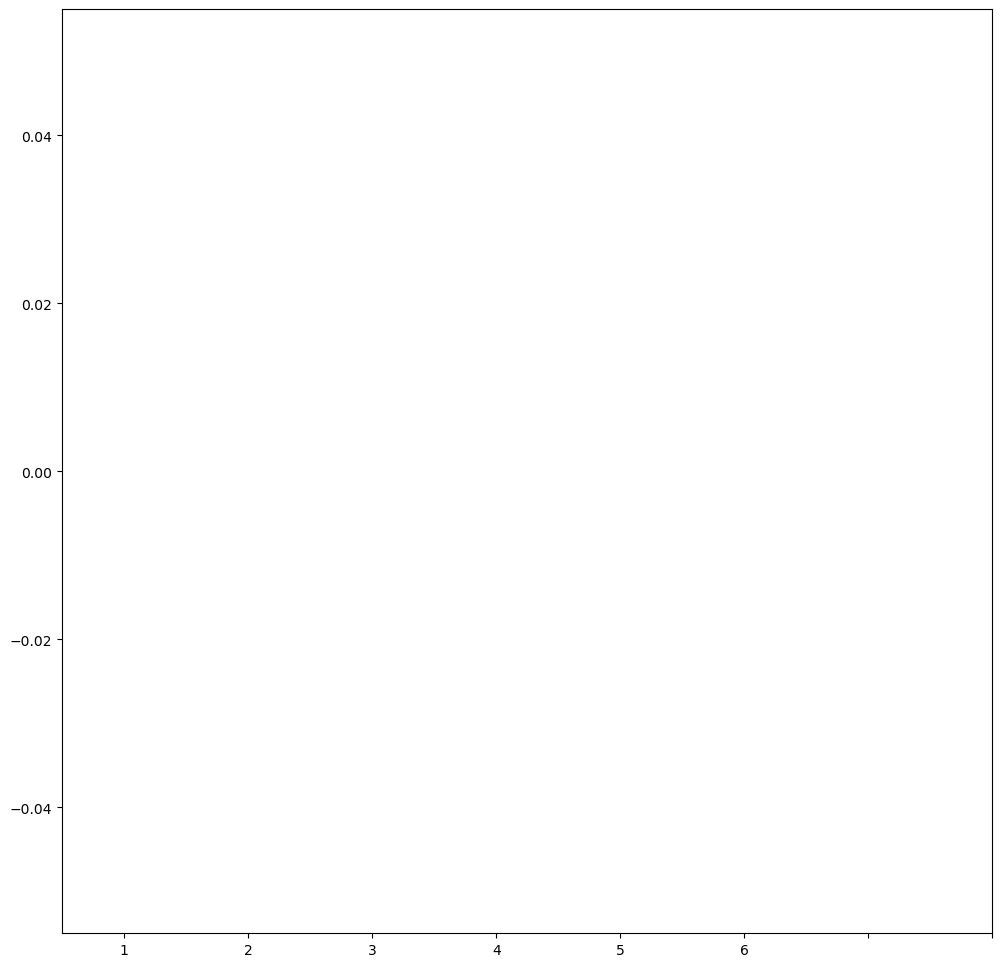

In [21]:
plt.figure(figsize = (12, 12))
plt.boxplot(unemployment.T)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8], unemployment.T.columns.tolist())
plt.show()

C:\Users\rajsi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rajsi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rajsi\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


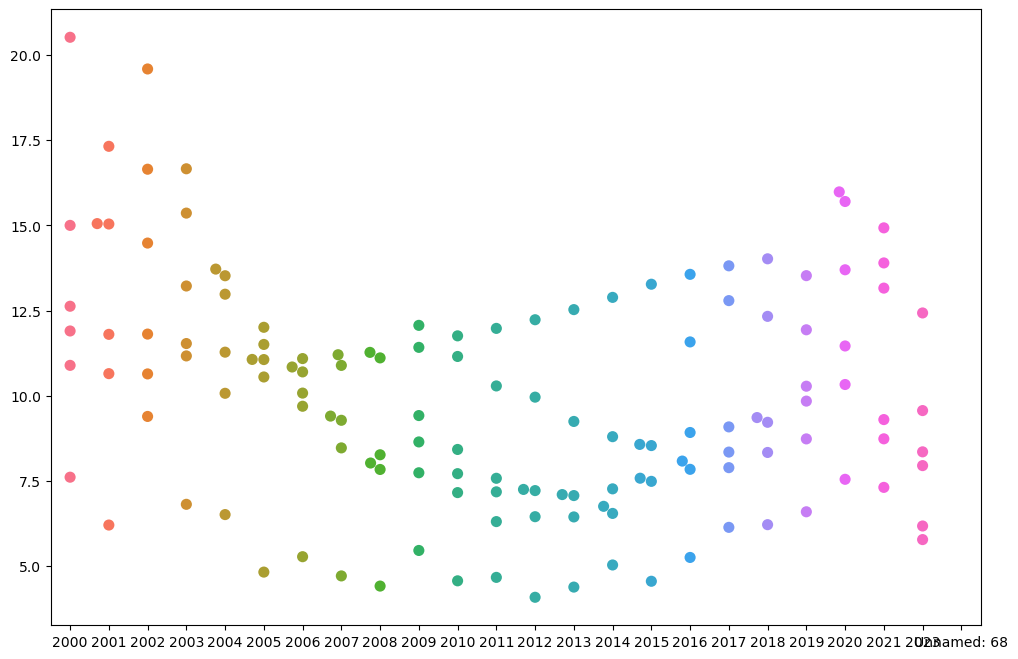

In [22]:
plt.figure(figsize=(12, 8))
sns.swarmplot(data=unemployment, size=8)
plt.show()

Line Graph showing & Comparing the growths and dips of all the 8 Countries for unemployment over the years


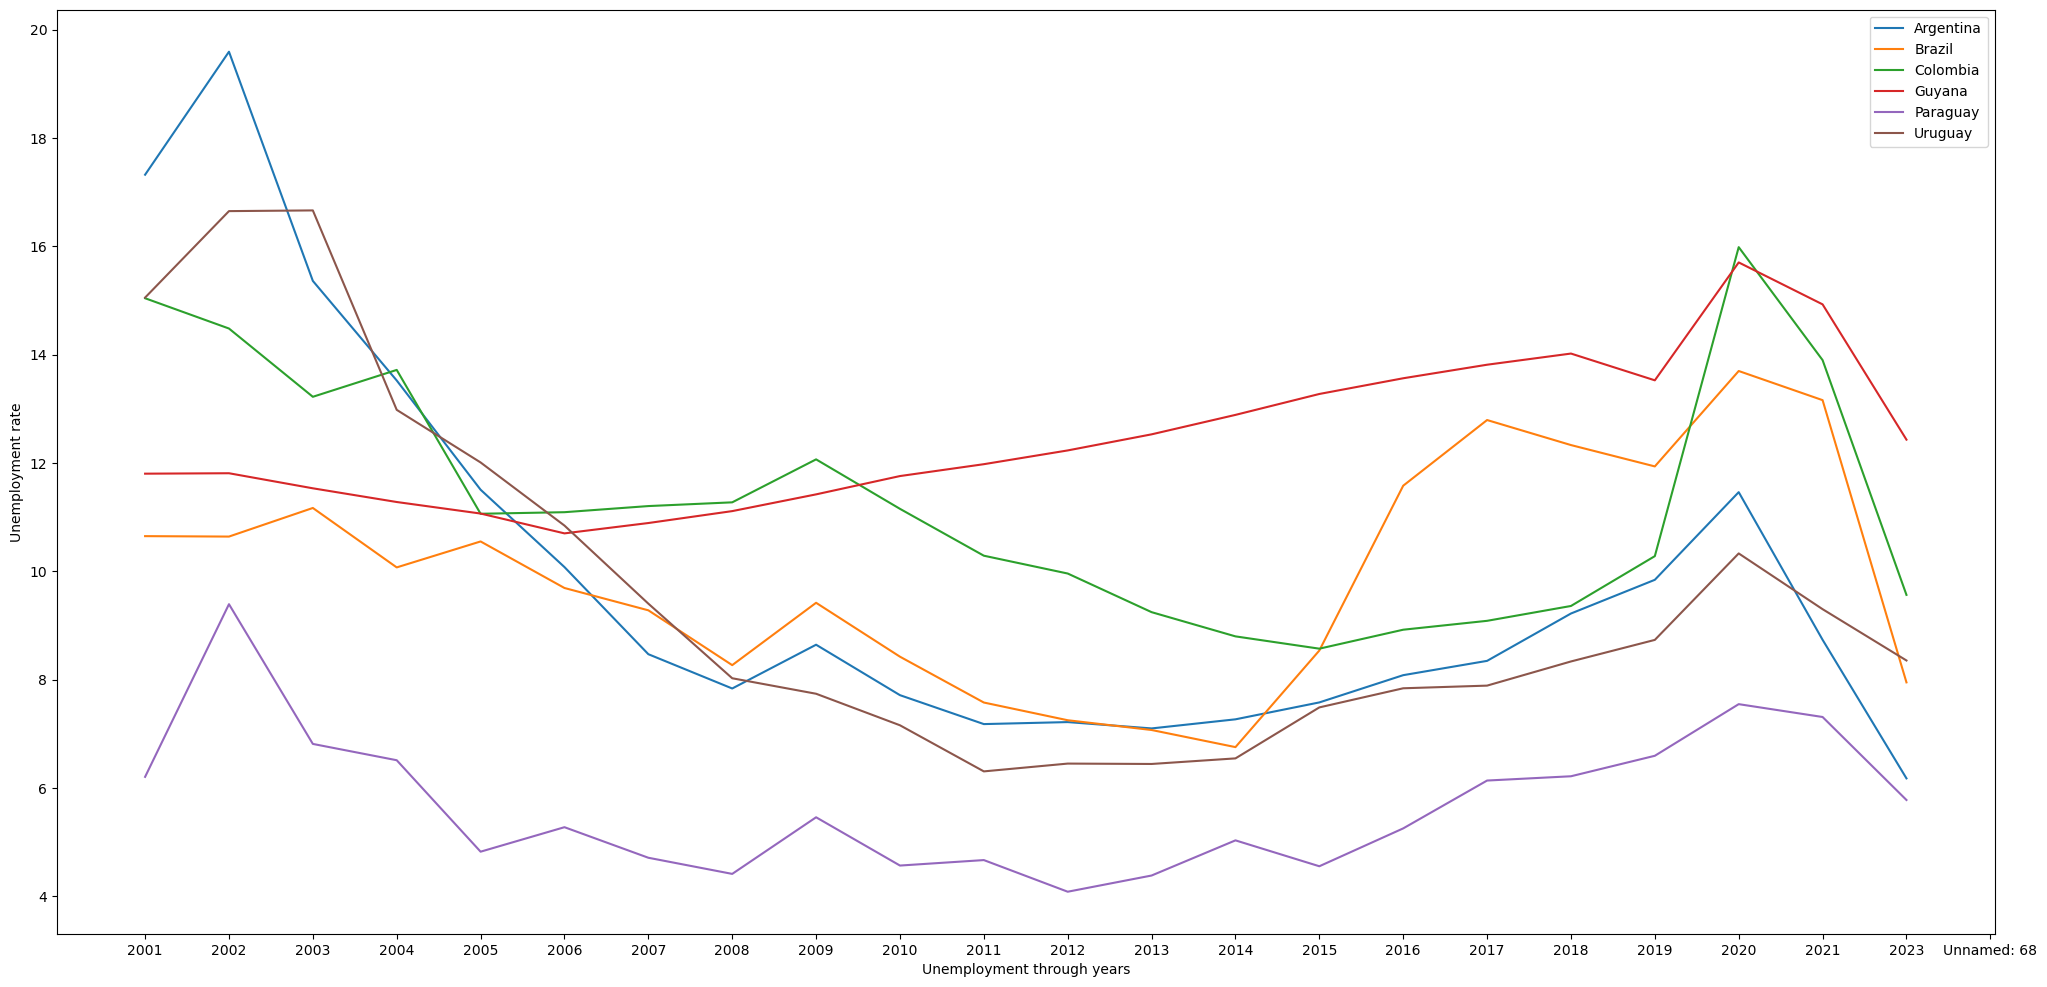

In [23]:
fig, ax = plt.subplots(figsize = (25, 12))

for index, row in unemployment.iloc[:, 1:].iterrows():
    ax.plot(row.index, row.values, label = index)
    
ax.set_xlabel('Unemployment through years')
ax.set_ylabel('Unemployment rate')
ax.legend()

plt.show()

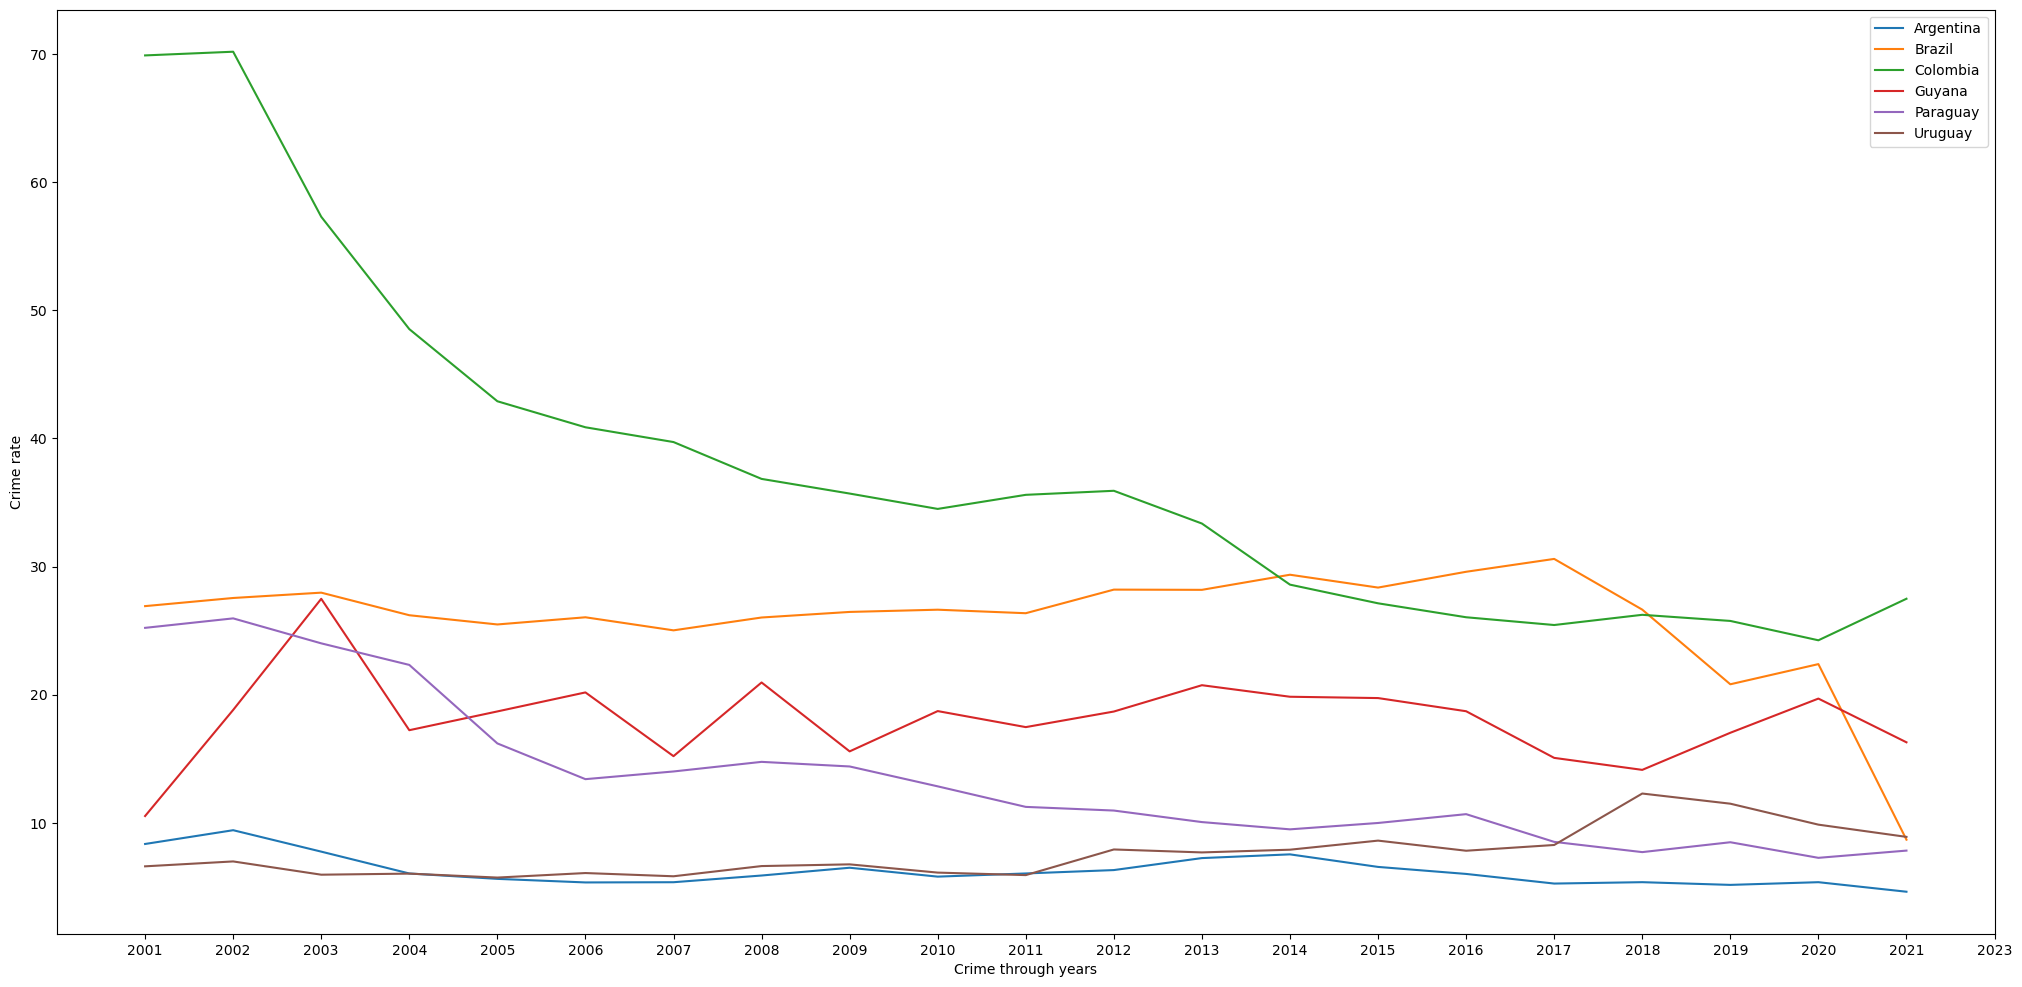

In [24]:
fig, ax = plt.subplots(figsize = (25, 12))

for index, row in crime.iloc[:, 1:].iterrows():
    ax.plot(row.index, row.values, label = index)
    
ax.set_xlabel('Crime through years')
ax.set_ylabel('Crime rate')
ax.legend()

plt.show()

Variability in crime rates using violin plot

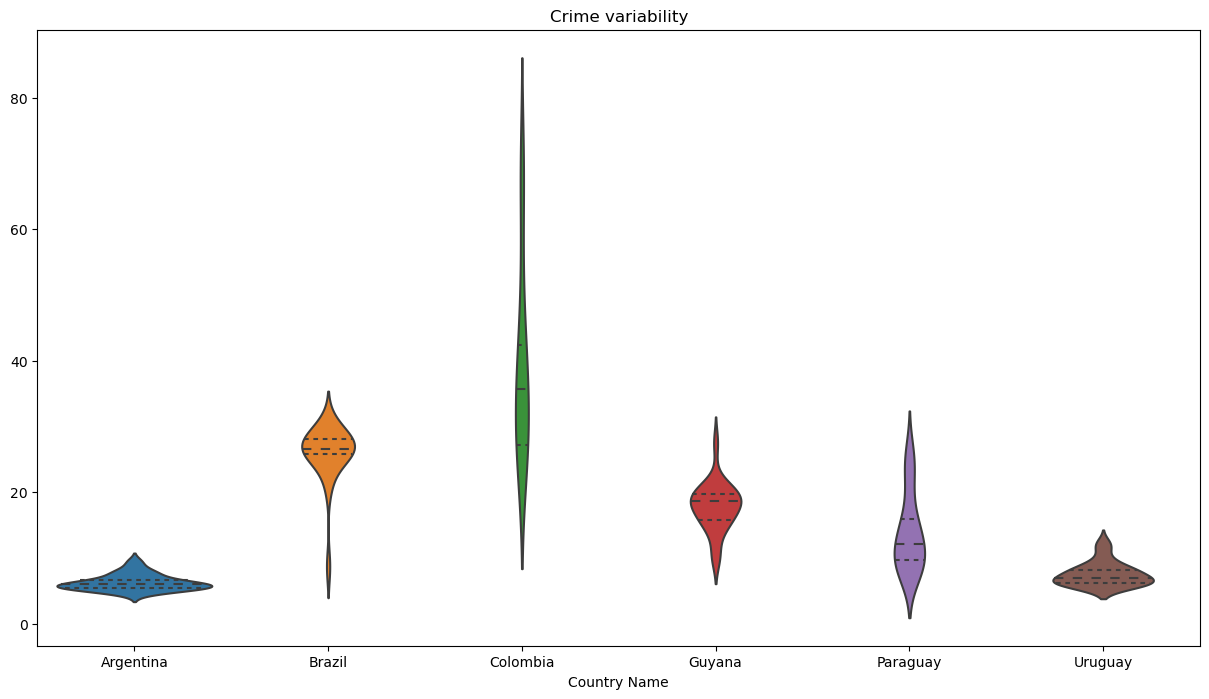

In [25]:
plt.figure(figsize=(15, 8))
sns.violinplot(data=crime.T, inner='quartile')
plt.title('Crime variability')
plt.show()

Crime rate through the years using heatmap

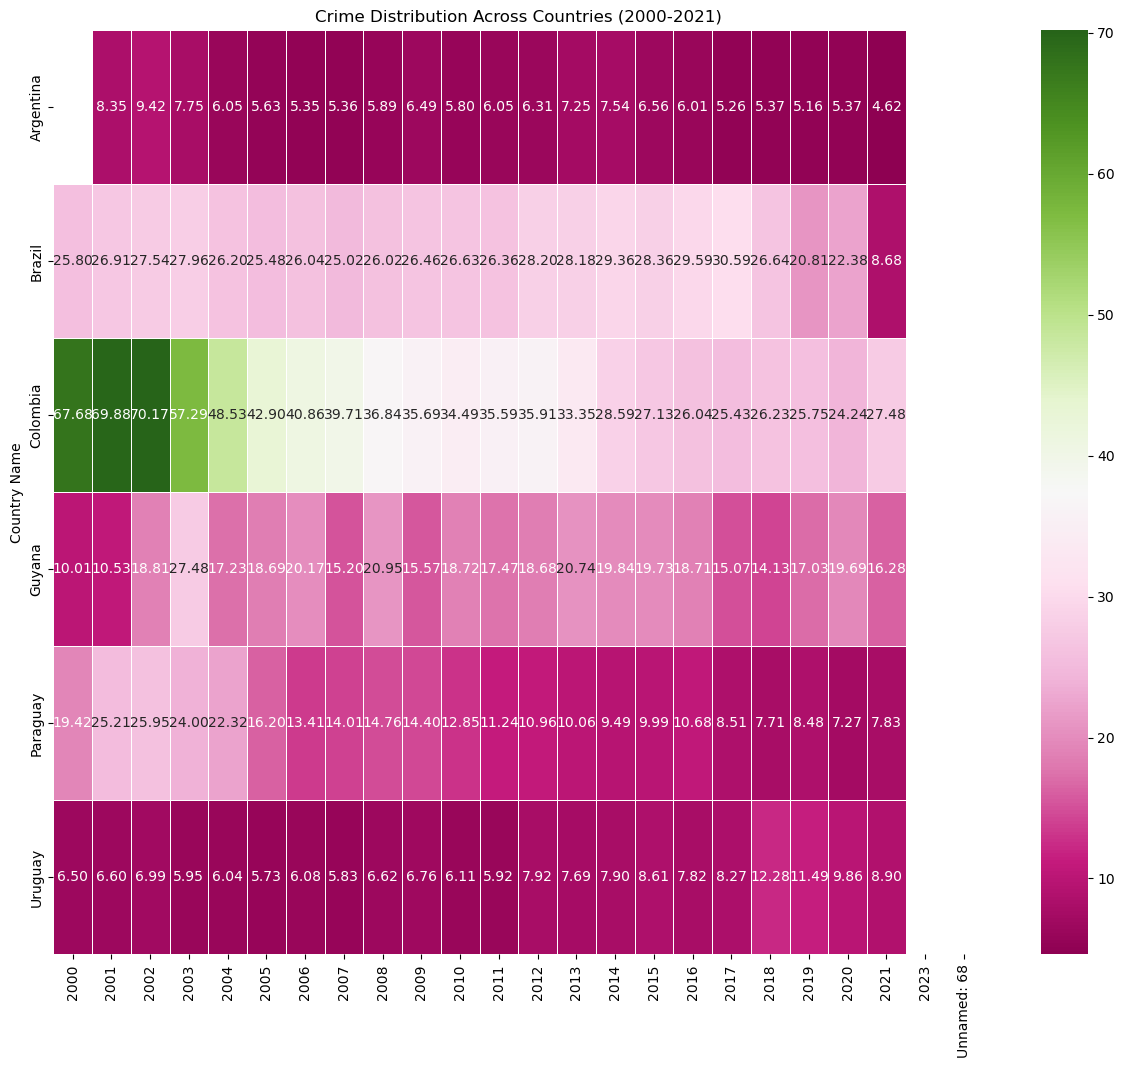

In [26]:
plt.figure(figsize = (15, 12))
sns.heatmap(crime, cmap='PiYG', annot=True, fmt=".2f", linewidths=.5)
plt.title('Crime Distribution Across Countries (2000-2021)')
plt.show()

# 8.Results (Correlation Analysis)
To get the correlation between the unemployment and crime data, the following charts are created by combining the above charts.
Compare different countries unemployment and crime rates (Year wise)

In [27]:
unemployment.T

Country Name,Argentina,Brazil,Colombia,Guyana,Paraguay,Uruguay
2000,15.000,10.892,20.520,11.901,7.610,12.627
2001,17.320,10.649,15.040,11.802,6.206,15.052
2002,19.590,10.641,14.481,11.810,9.393,16.648
2003,15.360,11.169,13.221,11.532,6.814,16.661
2004,13.522,10.072,13.717,11.279,6.513,12.980
2005,11.506,10.551,11.062,11.066,4.825,12.009
2006,10.078,9.692,11.091,10.700,5.277,10.844
2007,8.470,9.280,11.204,10.891,4.713,9.403
2008,7.837,8.268,11.273,11.111,4.415,8.026
2009,8.645,9.419,12.066,11.420,5.460,7.740


IndexError: single positional indexer is out-of-bounds

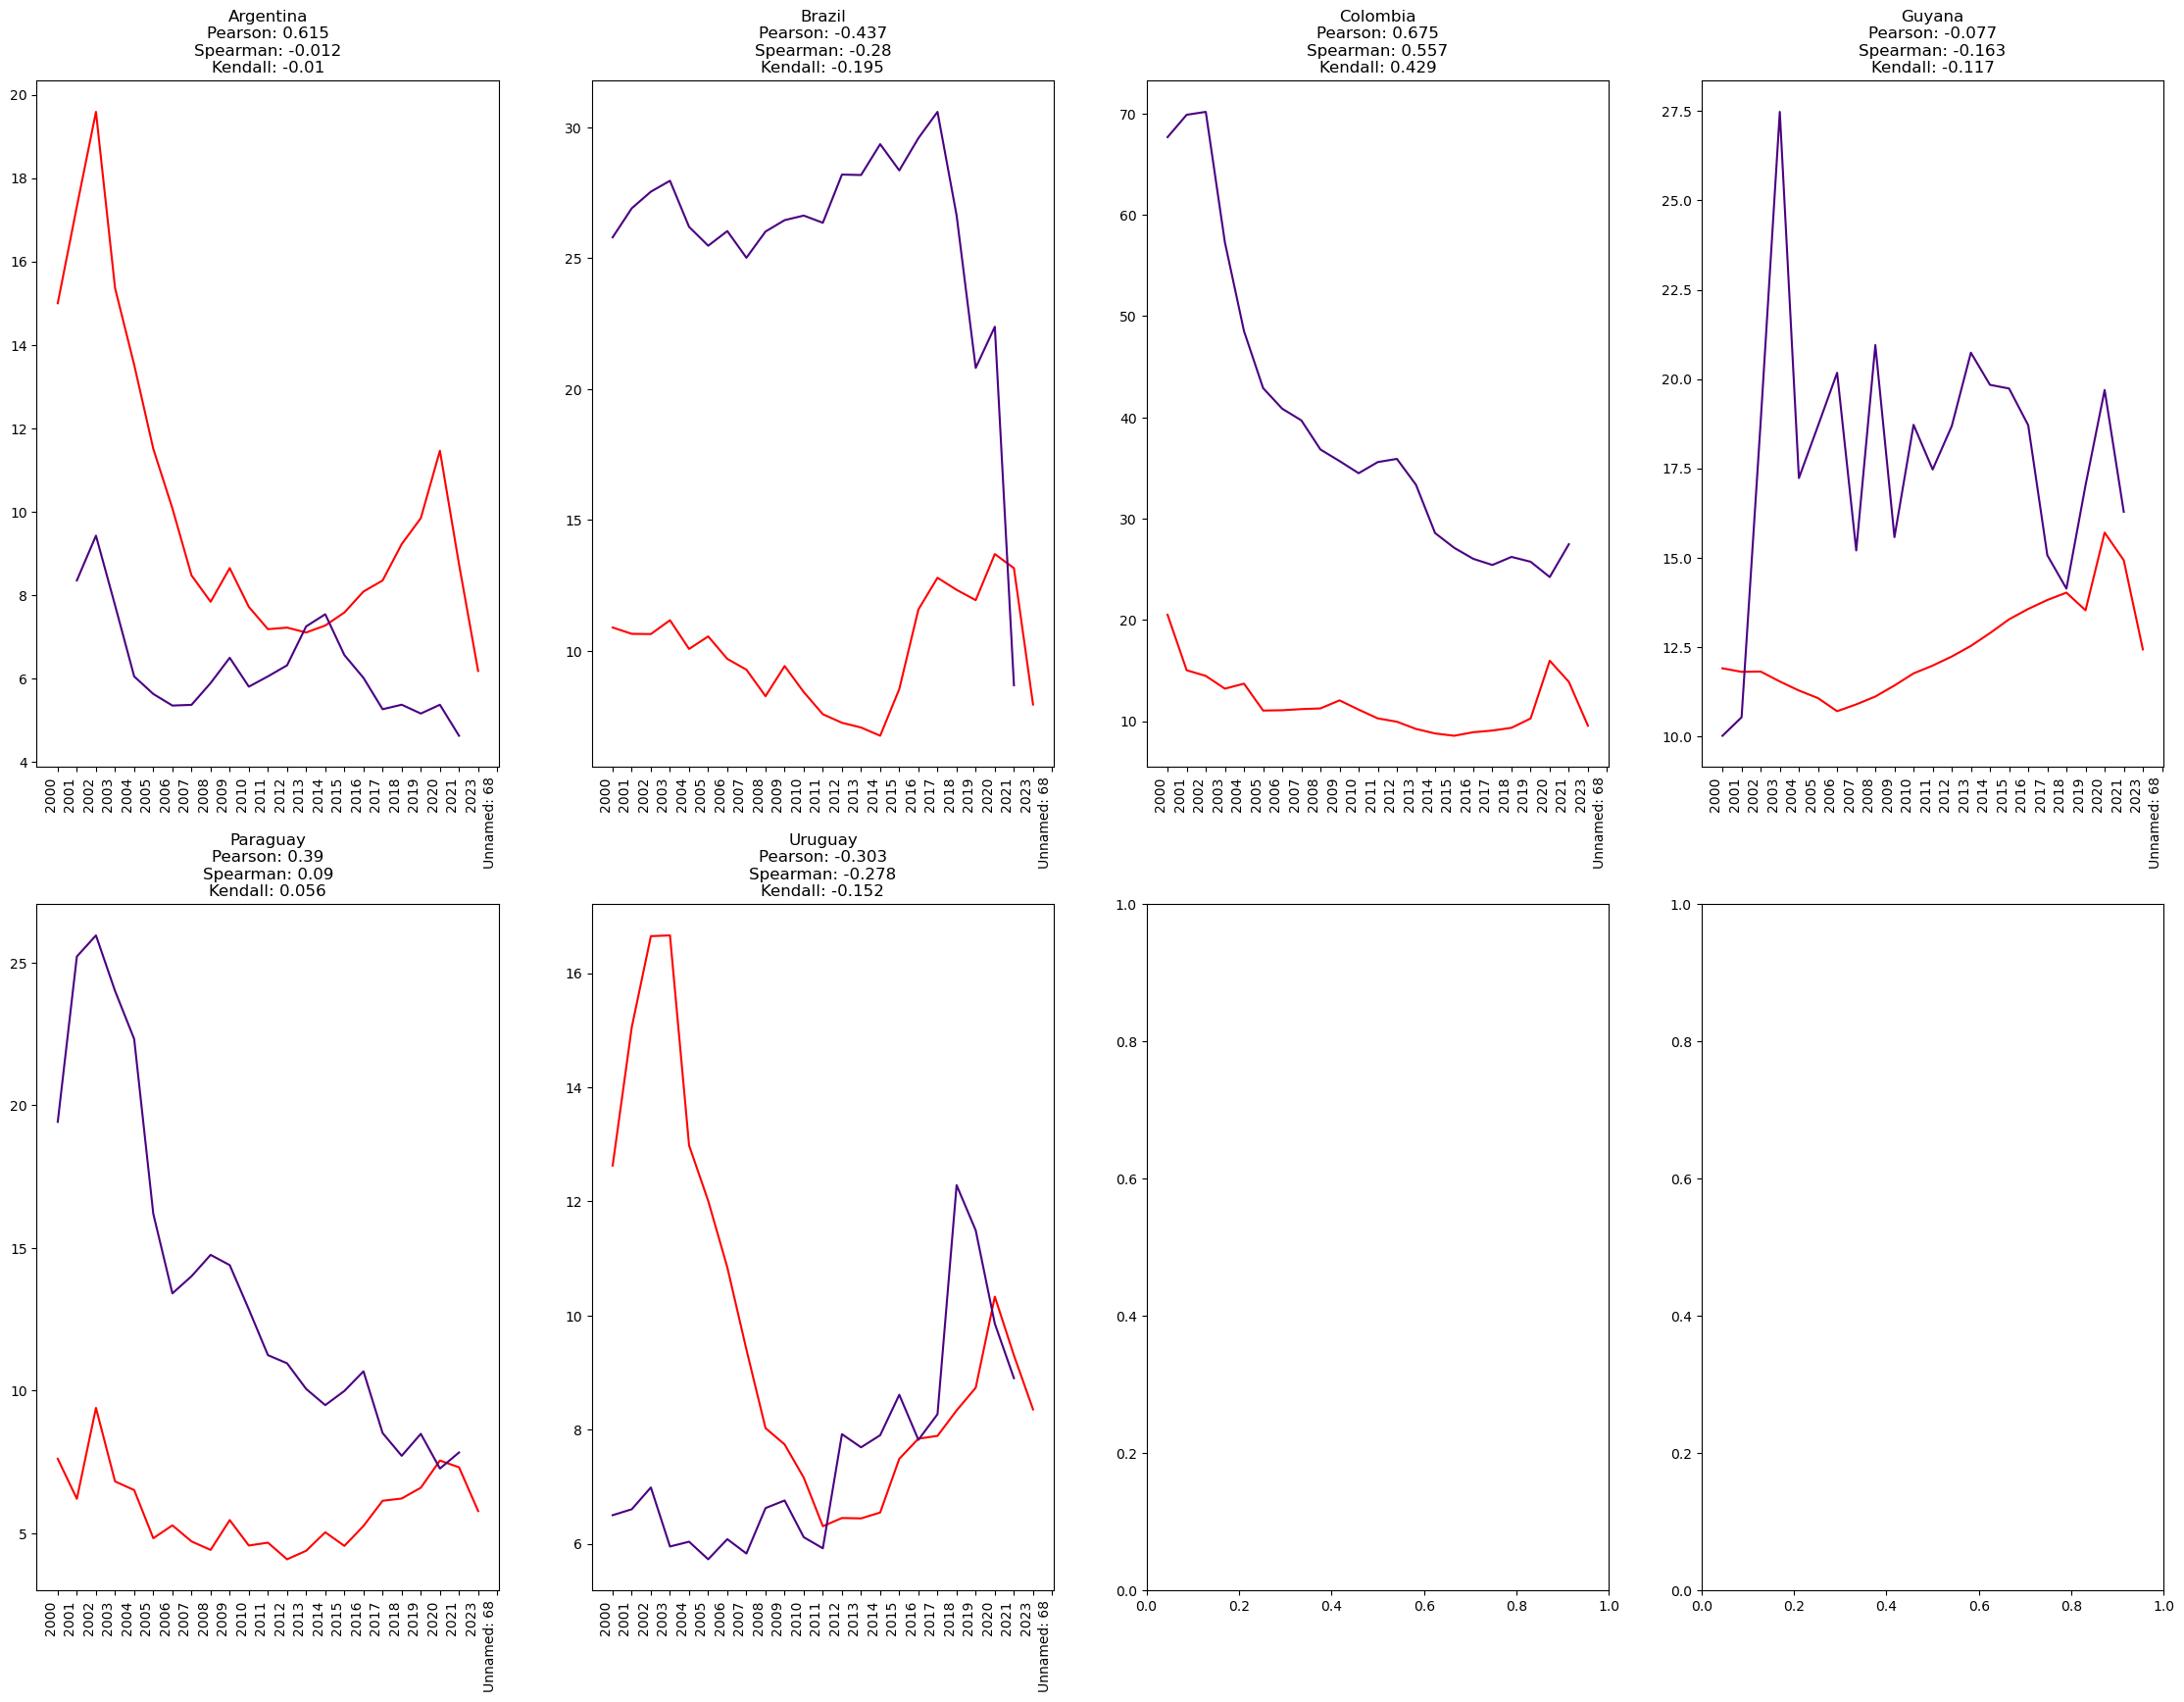

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(28, 20))
c = 0

for i in range(2):  # Loop over rows
    for j in range(4):  # Loop over columns
        if c < 8:
            axes[i, j].plot(unemployment.T.iloc[:,c], label='Unemployment', color = "red")
            axes[i, j].plot(crime.T.iloc[:, c], label='Crime', color = "indigo")
            
            correlation_value = unemployment.T.iloc[:,c].corr(crime.T.iloc[:, c])
            correlation_value = round(correlation_value, 3)
            
            correlation_value_s = unemployment.T.iloc[:,c].corr(crime.T.iloc[:, c], method = 'spearman')
            correlation_value_s = round(correlation_value_s, 3)
            
            correlation_value_k = unemployment.T.iloc[:,c].corr(crime.T.iloc[:, c], method = 'kendall')
            correlation_value_k = round(correlation_value_k, 3)
            
            col_name = unemployment.T.columns[c]
            axes[i, j].set_title(f"{col_name}\nPearson: {correlation_value}\nSpearman: {correlation_value_s}\nKendall: {correlation_value_k}")
            axes[i, j].set_xticks(axes[i, j].get_xticks())
            axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=90, ha='right')
            c += 1
        else:
            axes[i, j].axis('off')
            
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels,  bbox_to_anchor=(1, 0.9))
fig.suptitle('1.Unemployment and Crime Relationship for Different Countries over the years', fontsize=40)
plt.subplots_adjust(hspace=0.2)
plt.show()


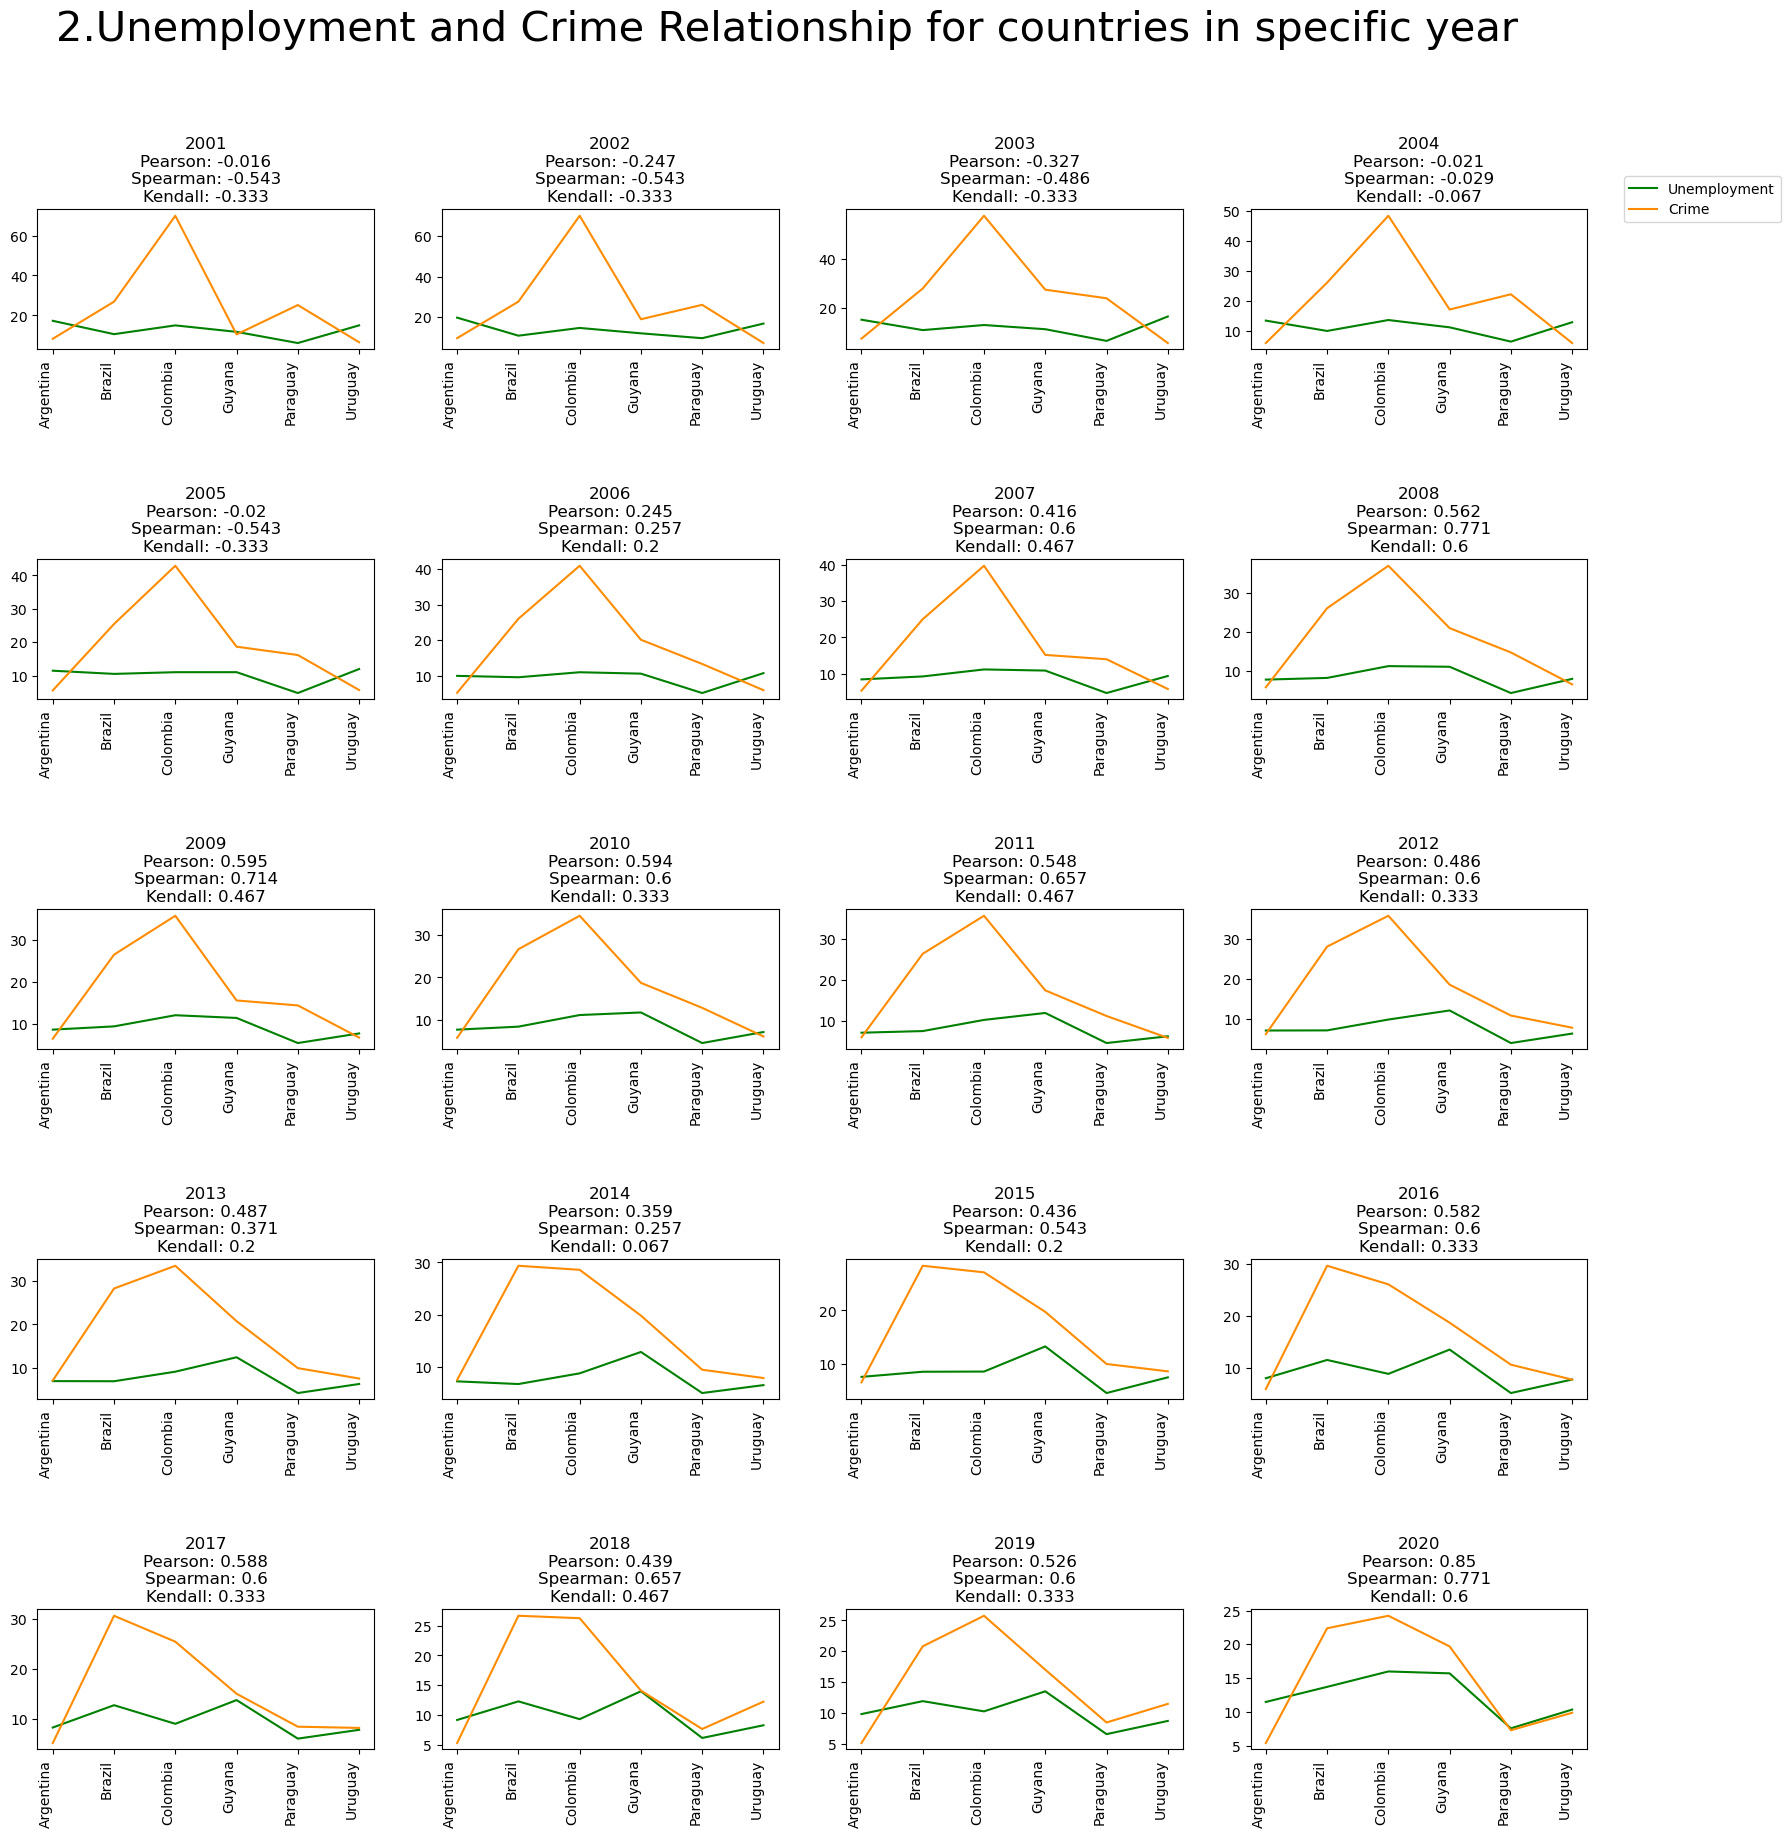

In [29]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
c = 2001

for i in range(5):  # Loop over rows
    for j in range(4):  # Loop over columns
        if c < 2021:
            axes[i, j].plot(unemployment[str(c)], label='Unemployment', color = "green")
            axes[i, j].plot(crime[str(c)], label='Crime', color = "darkorange")
            
            correlation_value = unemployment[str(c)].corr(crime[str(c)])
            correlation_value = round(correlation_value, 3)
            
            correlation_value_s = unemployment[str(c)].corr(crime[str(c)], method = 'spearman')
            correlation_value_s = round(correlation_value_s, 3)
            
            correlation_value_k = unemployment[str(c)].corr(crime[str(c)], method = 'kendall')
            correlation_value_k = round(correlation_value_k, 3)
            
            axes[i, j].set_title(f"{c}\nPearson: {correlation_value}\nSpearman: {correlation_value_s}\nKendall: {correlation_value_k}")
            axes[i, j].set_xticks(axes[i, j].get_xticks())
            axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=90, ha='right')
            c += 1
        else:
            axes[i, j].axis('off')
            
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels,  bbox_to_anchor=(1, 0.9))
fig.suptitle('2.Unemployment and Crime Relationship for countries in specific year', fontsize=30)
plt.subplots_adjust(hspace=1.5)
plt.show()


# 9.Conclusions:

<b>Summary of the plots</b> <br>

1. From the box plot, the unemployment rate data do not spread much in case of Canada, France and India. However, India and Canada show some outliers which means in some years there have been very high/low rates of unemployment which is unusual. Lowest unemployment rates can be seen in Japan which is slightly right-skewed. UK and US are left-skewed. Italy has the highest unemployment rate median.

2. Over the years, unemployment rates are different in case of different countries as can be seen in swarmplot. In 2014, we see, unemployment rates are very different but in case of 2009, 2010, 2011 unemployment rates do come close. But no concrete conclusions with respect to years can be made.

3. Country wise growth/dip of unemployment can be seen in the line plot where Germany and Japan show a significant reduce over the years. In Italy we see great volatality where till 2007 it shows a steep decrease but then takes on a hilly road to reach highest unemployment rate in 2014 and further decrease can be seen. In 2020, we see an unusual peak with respect to all countries except Italy and France. India has an up-down in 2019-2020, despite that there is no difference in the unemployment rate over two decades.

4. Violin plot shows the variability of crime rates in different countries in which UK, US and Italy shows how crime rates has oscillated a lot through two decades. Whereas Canada shows a case of having only one median which shows less changes through the years. Germany, France, India and Japan show a two median violin plots which indicates a significant difference in average of the crime data over the years.

5. The highest crime rate in year 2003 in United States can be clearly seen in the heatmap plot. Following two years also show a similar data and overall the highest crime rates have been recorded in US, India comes at second position. In 2021, UK shows an abnormal increase which was not seen in 20 years, could be termed as an outlier or could require serious analysis to why this happened. Italy also put down unexpected crime rates in the years 2003 and 2004.

6. Germany, Japan, Italy and France show a decrease in crime rates in 20 years but a significant decrease can be seen in the case of India where it comes down to approx 3 from 4.55, whereas Canada and US show an increase in crime rates over two decades. Italy and US both show an uncommon rise during 2003 and following years. Lowest crime rates have been recorded in Japan.


<b>Correlation</b> <br>
1. From Unemployment and Crime Relationship for Different Countries over the years we conclude that

  i) Germany and Japan: High Positive Linear Correlation

The data for Germany and Japan indicates a high Pearson correlation, suggesting a strong positive linear relationship between crime and unemployment over the years. This implies that as unemployment rates increase, there is a tendency for crime rates to also rise significantly in these countries.<br>

  ii)UK, India, Italy: Moderate Spearman Correlation

In the case of the UK, India, and Italy, the moderate Spearman correlation implies a moderate, nonlinear relationship between crime and unemployment. While not as strongly linear as in Germany and Japan, there is still a discernible connection, indicating that changes in unemployment may moderately influence crime rates in these countries.<br>

 iii) Canada, France, US: Less Correlation

For Canada, France, and the United States, there is less correlation between crime and unemployment. This suggests that the fluctuations in unemployment rates may not be closely tied to changes in crime rates in these countries. Other factors, such as social policies, law enforcement strategies, or economic conditions, may have a more significant impact on crime rates compared to unemployment.<br>

2. From Unemployment and Crime Relationship for countries in specific year, a clear distinction emerges between two time periods

  i) High Pearson Correlation (2009, 2010, 2011, 2012, 2020): Moderately Strong Linear Relationship

For the years 2009, 2010, 2011, 2012, and 2020, a high Pearson correlation coefficient suggests a moderately strong linear relationship between unemployment and crime. This implies that during these specific years, changes in unemployment rates are more likely to be associated with corresponding changes in crime rates. The strength of this relationship indicates that economic factors, such as job opportunities and financial stability, play a significant role in influencing crime rates during these periods.<br>

  ii) Weak Relationship (2001-2008, 2013-2019): Weak Correlation

In contrast, for the years 2001 to 2008 and 2013 to 2019, the relationship between unemployment and crime is characterized by a weak correlation. This suggests that during these years, the fluctuations in unemployment rates are not strongly or consistently linked to changes in crime rates. Other factors, such as social policies, law enforcement strategies, or broader economic conditions, may have a more dominant impact on crime rates during these periods.<br>


3. Paradoxically, low unemployment rates can disguise substantial poverty in a country, while high unemployment rates can occur in countries with a high level of economic development and low rates of poverty.

# 10.Limitations and Future works 
Addressing the limitations and exploring future avenues for research will enhance the depth and applicability of the findings regarding the relationship between unemployment and crime. This could lead to more informed policy recommendations and a better understanding of the complex dynamics at play.

Limitations 

1. Causation vs. Correlation: Correlation does not imply causation. Even if a correlation exists between unemployment and crime, it does not necessarily mean that one directly causes the other. There may be confounding variables or underlying factors that contribute to both.


2. Data quality and accuracy : The reliability of the conclusions heavily relies on the accuracy and quality of the data used. Incomplete or inaccurate data could lead to skewed results and misinterpretations.

For unemployment data following factors were not taken into account:

   1. Employment and unemployment due to seasonal unemployment nature eg. in agriculture etc. was not taken into account

   2. Many Women are often responsible for the care of children and the elderly and for household affairs and also due to    social, cultural descrimination and thus mainly are not registered as unemployed.

   3. There may be also persons not currently in the labour market who want to work but do not actively "seek" work because they view job opportunities as limited, or because they have restricted labour mobility, or face discrimination, or structural, social or cultural barriers.
   
For crime data following factors were not taken into account:

   1. An analysis of official reports and research literature is regularly carried out to verify homicide data used by government agencies and the scientific community. As a result of the data collection and validation process, in many countries several homicide datasets have become available from different or multiple sources and thus can led to different results

   2. The degree to which different societies apportion the level of culpability to acts resulting in death is also subject to variation.

3. Lack of Granularity: The study may lack granularity in examining specific types of crime or nuances in the labor market. Different crimes may have varied relationships with unemployment, and diverse job sectors may respond differently to economic changes.

4. Regional Variations: The analysis might overlook regional variations within countries. Different regions may experience distinct economic and social conditions that impact the relationship between unemployment and crime differently.


Future works:

1. Multifactorial Analysis: The simultaneous impact of multiple factors, such as social policies, education, and economic conditions, on crime rates can be investigated. Understanding the interplay of these factors can contribute to a more nuanced analysis.

2. Policy Evaluation: The impact of different social and economic policies on the relationship between unemployment and crime can be evaluated. This can inform policymakers about effective strategies for crime prevention and economic stability.

3. Machine Learning Approaches: Machine learning algorithms can be appllied to uncover non-linear patterns and interactions within the data. Techniques like regression trees, random forests, or neural networks may reveal complex relationships not captured by traditional statistical methods.






